# Practical 8: Neural Network

### Prepared by: <a href="https://www.linkedin.com/in/a-kanaan/">Dr Abdulkarim M. Jamal Kanaan</a>
<hr>

* Acknowledgements: I would like to acknowledge the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" written by Aurélien Géron. This practical exercise was prepared by Chapter 10 of the book, titled "Introduction to Artificial Neural Networks with Keras."

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/a-kanaan/dm-practicals/blob/main/practical8/prac8_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
y_pred

array([ True, False])

## Regression MLPs

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid) #clean prediction
rmse = mean_squared_error(y_valid, y_pred, squared=False) #validation score
rmse

0.5053326657968591

## Classification MLPs

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid) #score by default
accuracy

1.0

## Building an Image Classifier Using the Sequential API

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

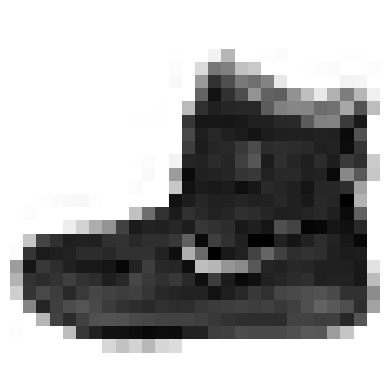

In [8]:
#show sample
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [10]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Ankle boot'

### Create Model

In [13]:
# create model
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28])) #28X28=784
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu")) #1st hidden
model.add(tf.keras.layers.Dense(100, activation="relu")) #2nd hidden
model.add(tf.keras.layers.Dense(10, activation="softmax")) #output layer

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03230076, -0.04684762,  0.01369642, ..., -0.02276393,
        -0.00953899, -0.05702434],
       [-0.04120658,  0.06967153,  0.05018656, ...,  0.06764799,
         0.00270405,  0.00885864],
       [-0.03079726,  0.03965205, -0.00965725, ...,  0.06695738,
        -0.05941523, -0.05219975],
       ...,
       [ 0.01097006, -0.05858987,  0.06828254, ..., -0.06862143,
        -0.02751077,  0.01964545],
       [ 0.06521553,  0.01413347, -0.01695242, ...,  0.01517456,
        -0.04154812,  0.05138186],
       [ 0.07094352, -0.04057749,  0.00636012, ...,  0.04620954,
        -0.05189041, -0.02728786]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

### Compile Model

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Train Model

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 4ms/step - loss: 0.7107 - accuracy: 0.7658 - val_loss: 0.5047 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4834 - accuracy: 0.8334 - val_loss: 0.4607 - val_accuracy: 0.8304
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4373 - accuracy: 0.8476 - val_loss: 0.4232 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4122 - accuracy: 0.8556 - val_loss: 0.3952 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3917 - accuracy: 0.8629 - val_loss: 0.3920 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8671 - val_loss: 0.3930 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3628 - accuracy: 0.8713 - val_loss: 0.3698 - val_accuracy

### Evaluate Model

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8859


[0.32619038224220276, 0.8859000205993652]

### Predict

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 84ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)